In [38]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [47]:
ftemb_df = pd.read_csv("data/embeddings.csv")
lstm_df = pd.read_csv("data/lstm_embeddings.csv")
rawemb_df = pd.read_csv("data/raw_bert_embeddings.csv")

raw_df = pd.read_csv("data/data.csv")

In [123]:
def prepareData(data, test_size=0.2):
    X = data.drop(["text", "label"], axis=1).values
    Y = pd.get_dummies(data['label']).values
    #Y = data['label'].values
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=9)
    return X_train, X_test, Y_train, Y_test

def xgboostClf(data):
    print("Training XGBoost...")
    X_train, X_test, Y_train, Y_test = prepareData(data)

    clf = xgb.XGBClassifier(
        tree_method="gpu_hist",
        enable_categorical=True,
        objective="binary:logistic",
        eval_metric=["auc", "error"],
        random_state=9
    )
    # X is the dataframe we created in previous snippet
    clf.fit(X_train, Y_train, eval_set=[(X_test, Y_test)])
    # Must use JSON/UBJSON for serialization, otherwise the information is lost.
    clf.save_model("categorical-model.json")
    y_pred = clf.predict(X_test)
    print(clf.score(X_test, Y_test))
    print(classification_report(Y_test, y_pred, digits=5))
    return clf


def rfClf(data):
    print("Training Random Forest Tree...")
    X_train, X_test, Y_train, Y_test = prepareData(data)

    clf = SVC(random_state=9)
    clf.fit(X_train, Y_train)

    y_pred = clf.predict(X_test)
    print(clf.score(X_test, Y_test))
    print(classification_report(Y_test, y_pred, digits=5))
    return clf


def svmClf(data):
    print("Training SVM...")
    X_train, X_test, Y_train, Y_test = prepareData(data)

    clf = RandomForestClassifier(random_state=9)
    clf.fit(X_train, Y_train)

    y_pred = clf.predict(X_test)
    print(clf.score(X_test, Y_test))
    print(classification_report(Y_test, y_pred, digits=5))
    return clf

In [100]:
print("FineTuned BERT")
xgbclf = xgboostClf(ftemb_df.copy())
print("BERT")
xgbclf = xgboostClf(rawemb_df.copy())
print("LSTM")
xgbclf = xgboostClf(lstm_df.copy())

FineTuned BERT
Training XGBoost...
[0]	validation_0-auc:0.99528	validation_0-error:0.01579
[1]	validation_0-auc:0.99696	validation_0-error:0.01330
[2]	validation_0-auc:0.99755	validation_0-error:0.01275
[3]	validation_0-auc:0.99745	validation_0-error:0.01275
[4]	validation_0-auc:0.99765	validation_0-error:0.01191
[5]	validation_0-auc:0.99762	validation_0-error:0.01302
[6]	validation_0-auc:0.99766	validation_0-error:0.01219
[7]	validation_0-auc:0.99795	validation_0-error:0.01247
[8]	validation_0-auc:0.99795	validation_0-error:0.01275
[9]	validation_0-auc:0.99852	validation_0-error:0.01247
[10]	validation_0-auc:0.99849	validation_0-error:0.01219
[11]	validation_0-auc:0.99862	validation_0-error:0.01191
[12]	validation_0-auc:0.99862	validation_0-error:0.01247
[13]	validation_0-auc:0.99891	validation_0-error:0.01302
[14]	validation_0-auc:0.99894	validation_0-error:0.01247
[15]	validation_0-auc:0.99897	validation_0-error:0.01247
[16]	validation_0-auc:0.99896	validation_0-error:0.01302
[17]	v

In [45]:
model_name = "bert_finetuned"
data = pd.read_csv("data/lstm_embeddings.csv")
df = data.copy()

xgbclf = xgboostClf(df)

Training XGBoost...
[0]	validation_0-auc:0.49458	validation_0-error:0.02189
[1]	validation_0-auc:0.49349	validation_0-error:0.02189
[2]	validation_0-auc:0.49207	validation_0-error:0.02189
[3]	validation_0-auc:0.49318	validation_0-error:0.02189
[4]	validation_0-auc:0.49322	validation_0-error:0.02189
[5]	validation_0-auc:0.49358	validation_0-error:0.02189
[6]	validation_0-auc:0.49371	validation_0-error:0.02189
[7]	validation_0-auc:0.49368	validation_0-error:0.02189
[8]	validation_0-auc:0.49373	validation_0-error:0.02189
[9]	validation_0-auc:0.49373	validation_0-error:0.02189
[10]	validation_0-auc:0.49373	validation_0-error:0.02189
[11]	validation_0-auc:0.49378	validation_0-error:0.02189
[12]	validation_0-auc:0.49366	validation_0-error:0.02189
[13]	validation_0-auc:0.49250	validation_0-error:0.02189
[14]	validation_0-auc:0.49251	validation_0-error:0.02189
[15]	validation_0-auc:0.49258	validation_0-error:0.02189
[16]	validation_0-auc:0.49206	validation_0-error:0.02189
[17]	validation_0-auc

ValueError: multilabel-indicator is not supported

In [101]:
print("FineTuned BERT")
rForestClf = rfClf(ftemb_df.copy())
print("BERT")
rForestClf = rfClf(rawemb_df.copy())
print("LSTM")
rForestClf = rfClf(lstm_df.copy())

FineTuned BERT
Training Random Forest Tree...
0.9878082571349405
              precision    recall  f1-score   support

           0    0.98423   0.99795   0.99104      2439
           1    0.99560   0.96667   0.98092      1170

    accuracy                        0.98781      3609
   macro avg    0.98991   0.98231   0.98598      3609
weighted avg    0.98792   0.98781   0.98776      3609

BERT
Training Random Forest Tree...
0.8539761706844001
              precision    recall  f1-score   support

           0    0.82473   0.99549   0.90210      2439
           1    0.98346   0.55897   0.71281      1170

    accuracy                        0.85398      3609
   macro avg    0.90409   0.77723   0.80745      3609
weighted avg    0.87619   0.85398   0.84073      3609

LSTM
Training Random Forest Tree...
0.9775561097256857
              precision    recall  f1-score   support

           0    0.98439   0.98237   0.98338      2439
           1    0.96340   0.96752   0.96546      1170

    acc

In [102]:
print("FineTuned BERT")
svClf = svmClf(ftemb_df.copy())
print("BERT")
svClf = svmClf(rawemb_df.copy())
print("LSTM")
svClf = svmClf(lstm_df.copy())

FineTuned BERT
Training SVM...
0.9889165973954004
              precision    recall  f1-score   support

           0    0.98740   0.99631   0.99184      2439
           1    0.99216   0.97350   0.98274      1170

    accuracy                        0.98892      3609
   macro avg    0.98978   0.98491   0.98729      3609
weighted avg    0.98895   0.98892   0.98889      3609

BERT
Training SVM...
0.8775284012191743
              precision    recall  f1-score   support

           0    0.85750   0.98196   0.91552      2439
           1    0.94608   0.65983   0.77744      1170

    accuracy                        0.87753      3609
   macro avg    0.90179   0.82089   0.84648      3609
weighted avg    0.88622   0.87753   0.87076      3609

LSTM
Training SVM...
0.9675810473815462
              precision    recall  f1-score   support

           0    0.98214   0.96966   0.97586      2439
           1    0.93838   0.96325   0.95065      1170

    accuracy                        0.96758      360

In [41]:
svmClassf = svmClf(df)

Shape of label tensor: (18045, 2)
(14436, 768) (14436, 2)
(3609, 768) (3609, 2)
0.9886395123302854
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2439
           1       0.99      0.97      0.98      1170

   micro avg       0.99      0.99      0.99      3609
   macro avg       0.99      0.98      0.99      3609
weighted avg       0.99      0.99      0.99      3609
 samples avg       0.99      0.99      0.99      3609



C:\Users\PC\.virtualenvs\CMP711_Project\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
def trainingLSTM(data):
    print("Training LSTM...")
    X_train, X_test, Y_train, Y_test = prepareData(data)

    model = Sequential()
    model.add(LSTM(100, input_shape=(768,1)))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'AUC'])
    print(model.summary())

    epochs = 100
    batch_size = 128

    history = model.fit(
        X_train, Y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.1,
        callbacks=[
            EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)
            ]
        )

    accr = model.evaluate(X_test, Y_test)
    print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0], accr[1]))

    predictions = model.predict(X_test)
    preds = np.argmax(predictions, axis=1)

    print(classification_report(np.argmax(Y_test, axis=1), preds))

    return model, history


model, hist = trainingLSTM(df)

Training LSTM...
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dropout_17 (Dropout)        (None, 100)               0         
                                                                 
 dense_30 (Dense)            (None, 128)               12928     
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 dense_31 (Dense)            (None, 2)                 258       
                                                                 
Total params: 53,986
Trainable params: 53,986
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
102/102 [======

In [59]:
def trainingDenseNetwork(data):
    print("Training NN...")
    X_train, X_test, Y_train, Y_test = prepareData(data)

    model = Sequential()
    model.add(Dense(1024, activation='relu', input_shape=(768,)))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu', input_shape=(768,)))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'AUC'])
    print(model.summary())

    epochs = 100
    batch_size = 128

    history = model.fit(
        X_train, Y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.1,
        callbacks=[
            EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)
            ]
        )

    accr = model.evaluate(X_test, Y_test)
    print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0], accr[1]))

    predictions = model.predict(X_test)
    preds = np.argmax(predictions, axis=1)

    print(classification_report(np.argmax(Y_test, axis=1), preds))

    return model, history


model, hist = trainingDenseNetwork(df)

Training NN...
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1024)              787456    
                                                                 
 dropout_13 (Dropout)        (None, 1024)              0         
                                                                 
 dense_25 (Dense)            (None, 128)               131200    
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_26 (Dense)            (None, 2)                 258       
                                                                 
Total params: 918,914
Trainable params: 918,914
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
102/102 [======

In [4]:
def trainingLSTM(data):
    print("Training LSTM...")
    # The maximum number of words to be used. (most frequent)
    MAX_NB_WORDS = 50000
    # Max number of words in each complaint.
    MAX_SEQUENCE_LENGTH = 512
    # This is fixed.
    EMBEDDING_DIM = 768

    tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
    tokenizer.fit_on_texts(df['text'].values)
    word_index = tokenizer.word_index
    print('Found %s unique tokens.' % len(word_index))

    X = tokenizer.texts_to_sequences(df['text'].values)
    X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
    print('Shape of data tensor:', X.shape)

    Y = pd.get_dummies(df['label']).values
    print('Shape of label tensor:', Y.shape)

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=9)
    print(X_train.shape, Y_train.shape)
    print(X_test.shape, Y_test.shape)

    model = Sequential()
    model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
    model.add(SpatialDropout1D(0.2))
    model.add(LSTM(100, dropout=0.2))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())

    epochs = 100
    batch_size = 128

    history = model.fit(
        X_train, Y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.1,
        callbacks=[
            EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)
            ]
        )

    accr = model.evaluate(X_test, Y_test)
    print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0], accr[1]))

    predictions = model.predict(X_test)
    preds = np.argmax(predictions, axis=1)

    print(classification_report(np.argmax(Y_test, axis=1), preds))

    return model, history


#model_raw, hist_raw = trainingLSTM(pd.read_csv("data/data.csv"))

In [70]:
from keras.utils import plot_model

plot_model(model_raw)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [5]:
df.shape

(18045, 770)

In [7]:
data = pd.read_csv("data/data.csv")
df = data.copy()
df.head()

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 512
# This is fixed.
EMBEDDING_DIM = 768

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

X = tokenizer.texts_to_sequences(df['text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Y = pd.get_dummies(df['label']).values
print('Shape of label tensor:', Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=9)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Found 35216 unique tokens.
Shape of data tensor: (18045, 512)
Shape of label tensor: (18045, 2)
(14436, 512) (14436, 2)
(3609, 512) (3609, 2)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 512, 768)          38400000  
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 512, 768)         0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 100)               347600    
                                                                 
 dense_1 (Dense)             (None, 2)                 202       
                                                                 
Total params: 38,747,802
Trainable params: 38,747,802
Non-trainable params: 0
________________________________

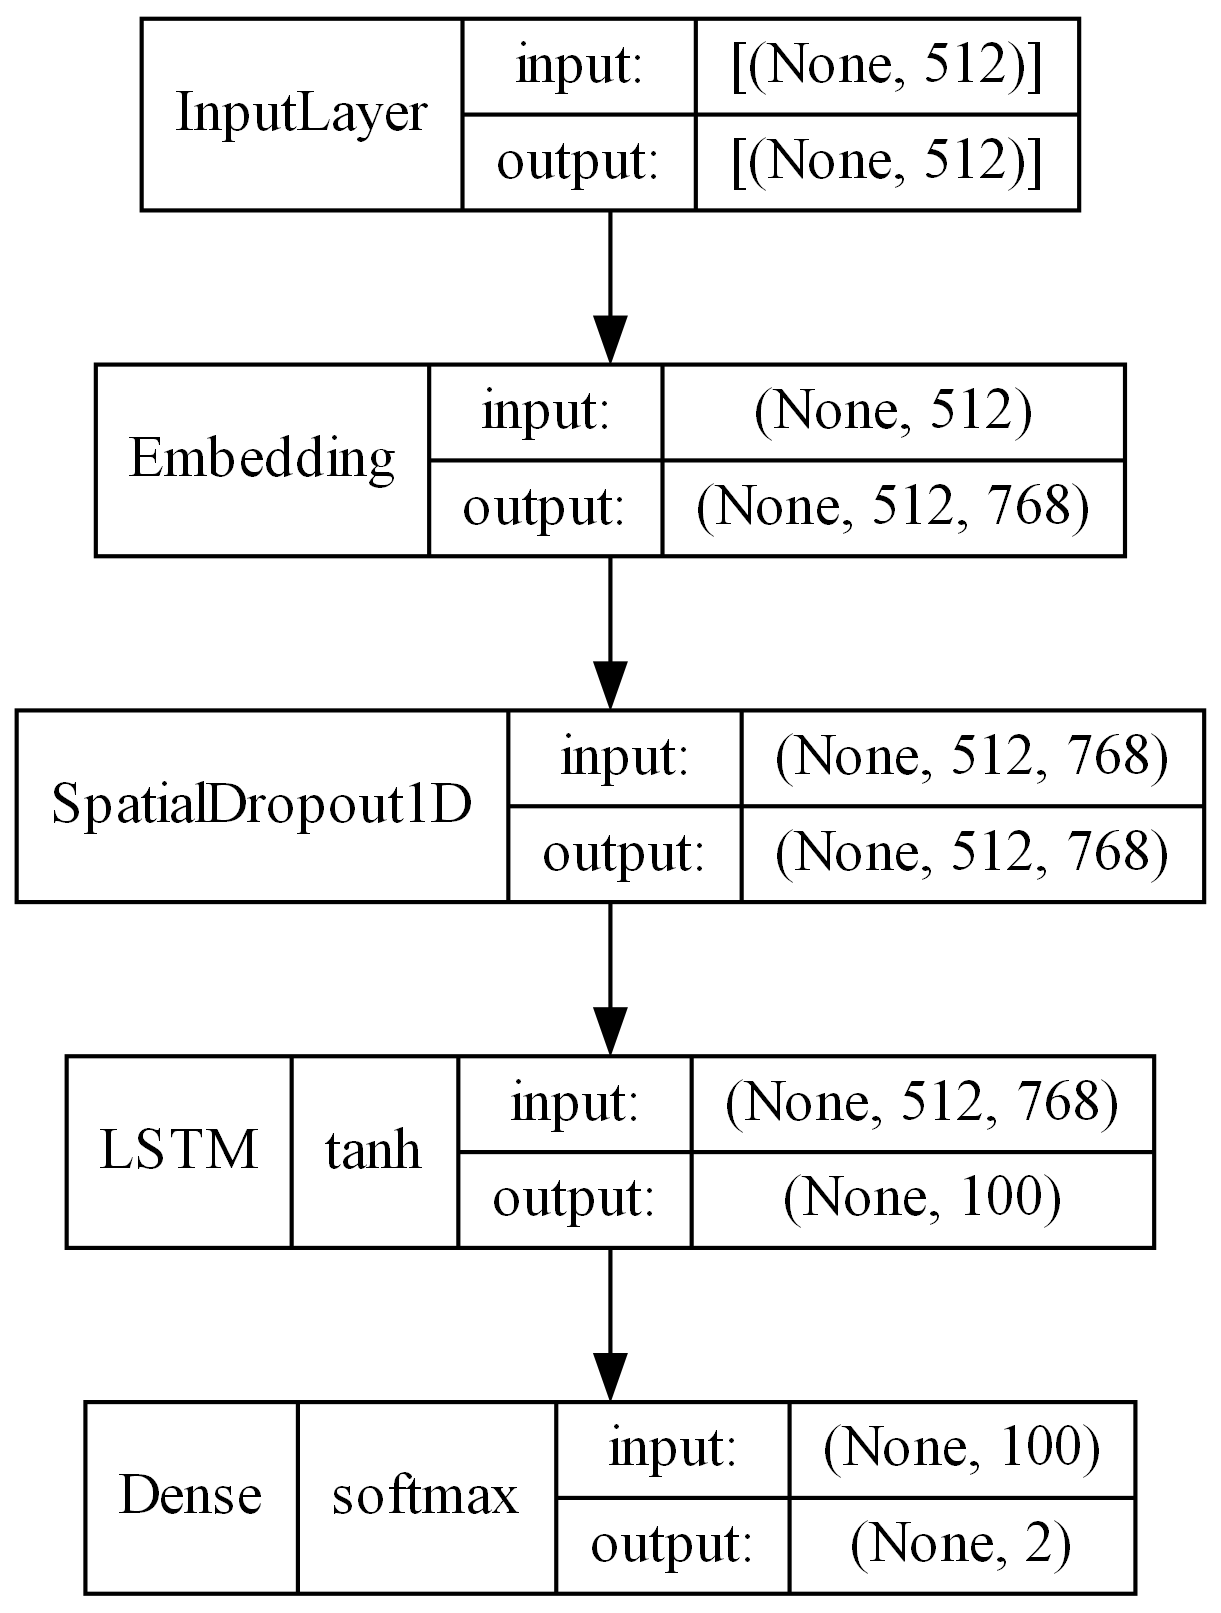

In [15]:
from keras.utils import plot_model
import os
os.environ["PATH"] += os.pathsep + "C:\\Program Files\\Graphviz\\bin"

plot_model(
    model,
    show_shapes=True,
    show_layer_activations=True,
    expand_nested=True,
    show_layer_names=False,
    dpi=300
)

In [17]:
data = pd.read_csv("data/data.csv")
df = data.copy()
df.head()

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 512
# This is fixed.
EMBEDDING_DIM = 768

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

X = tokenizer.texts_to_sequences(df['text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Y = pd.get_dummies(df['label']).values
print('Shape of label tensor:', Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=9)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

largemodel = Sequential()
largemodel.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
largemodel.add(SpatialDropout1D(0.2))
largemodel.add(LSTM(100, dropout=0.2))
largemodel.add(Dense(2, activation='softmax'))
largemodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
largemodel.load_weights("checkpoints/largemodel.h5")
print(largemodel.summary())

Found 35216 unique tokens.
Shape of data tensor: (18045, 512)
Shape of label tensor: (18045, 2)
(14436, 512) (14436, 2)
(3609, 512) (3609, 2)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 512, 768)          38400000  
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 512, 768)         0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 100)               347600    
                                                                 
 dense_1 (Dense)             (None, 2)                 202       
                                                                 
Total params: 38,747,802
Trainable params: 38,747,802
Non-trainable params: 0
________________________________

In [18]:
newmodel = Sequential()
for layer in largemodel.layers[:-1]:
    newmodel.add(layer)

# Freeze the layers
for layer in newmodel.layers:
    layer.trainable = False

newmodel.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 512, 768)          38400000  
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 512, 768)         0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 100)               347600    
                                                                 
Total params: 38,747,600
Trainable params: 0
Non-trainable params: 38,747,600
_________________________________________________________________


In [19]:
embs = newmodel.predict(X)

564/564 [==============================] - 105s 184ms/step


In [22]:
type(embs)

numpy.ndarray

In [30]:
clean_df = df.copy()

In [27]:
embs.shape

(18045, 100)

In [31]:
for i in range(embs.shape[1]):
    clean_df["f"+str(i+1)] = embs[:,1]

C:\Users\PC\AppData\Local\Temp\ipykernel_23488\2703923042.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clean_df["f"+str(i+1)] = embs[:,1]
C:\Users\PC\AppData\Local\Temp\ipykernel_23488\2703923042.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clean_df["f"+str(i+1)] = embs[:,1]


In [33]:
clean_df.to_csv("data/lstm_embeddings.csv", index=False)

In [34]:
from sklearn.manifold import TSNE
def tsne_transform(df, dropcols):
    tsne = TSNE(random_state = 9, n_iter = 1000, metric = 'cosine')
    embedding_vec = df.drop(dropcols, axis=1).values
    embeddings2d = tsne.fit_transform(embedding_vec)

    # TSNE DataFrame
    embeddingsDF = pd.DataFrame()
    embeddingsDF["text"] = df.text.values
    embeddingsDF["label"] = df.label.values
    embeddingsDF["x"] = embeddings2d[:,0]
    embeddingsDF["y"] = embeddings2d[:,1]

    return embeddingsDF

In [35]:
embs_DF = tsne_transform(clean_df, ["text", "label"])

In [36]:
embs_DF["label"] = embs_DF.label.map({0: "no-symptoms for depression", 1: "risk of depression"})

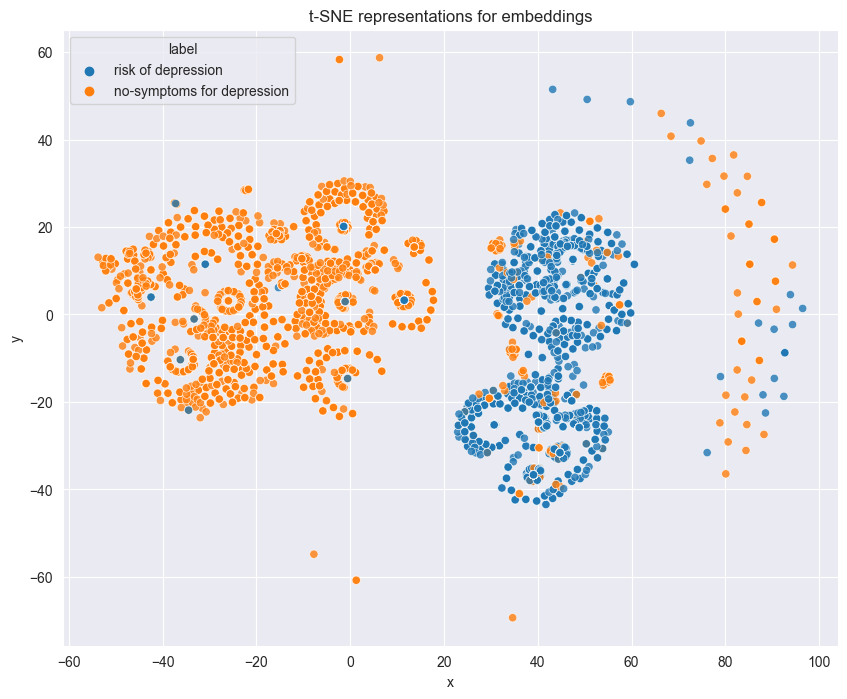

In [37]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=embs_DF, x="x", y="y", hue="label", alpha=0.8)
plt.title('t-SNE representations for embeddings')
plt.savefig("tsne_lstm.png")
plt.show()

In [124]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [131]:
def test_small(df, inp_shape=(768,)):
    X_train, X_test, Y_train, Y_test = prepareData(df)

    small_model = Sequential()
    small_model.add(Dense(32, activation="relu", input_shape=inp_shape))
    small_model.add(Dropout(0.2))
    small_model.add(Dense(2, activation="sigmoid"))
    small_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', f1_m,precision_m, recall_m])
    small_model.summary()

    epochs = 100
    batch_size = 128

    history = small_model.fit(
        X_train, Y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.1,
        callbacks=[
            EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001),
        ]
    )

    accr = small_model.evaluate(X_test, Y_test)
    print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0], accr[1]))

    plt.title('Loss')
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.show()

    predictions = small_model.predict(X_test)
    preds = np.argmax(predictions, axis=1)

    labels = ["no-signs of depression", "signs of depression"]
    print(classification_report(np.argmax(Y_test, axis=1), preds, digits=5, target_names=labels))
    cf_matrix = confusion_matrix(np.argmax(Y_test, axis=1), preds)

    cm_array_df = pd.DataFrame(cf_matrix, index=labels, columns=labels)
    ax = sns.heatmap(cm_array_df, annot=True, annot_kws={"size": 12}, fmt='.5g')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

    #sns.heatmap(cf_matrix, annot=True, fmt='.5g')
    plt.show()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 32)                24608     
                                                                 
 dropout_31 (Dropout)        (None, 32)                0         
                                                                 
 dense_59 (Dense)            (None, 2)                 66        
                                                                 
Total params: 24,674
Trainable params: 24,674
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
102/102 [==============================] - 1s 4ms/step - loss: 0.4733 - accuracy: 0.8081 - f1_m: 0.7933 - precision_m: 0.7960 - recall_m: 0.8029 - val_loss: 0.4160 - val_accuracy: 0.8400 - val_f1_m: 0.8356 - val_precision_m: 0.8340 - val_recall_m: 0.8372
Epoch 2/100
102/102 [=========================

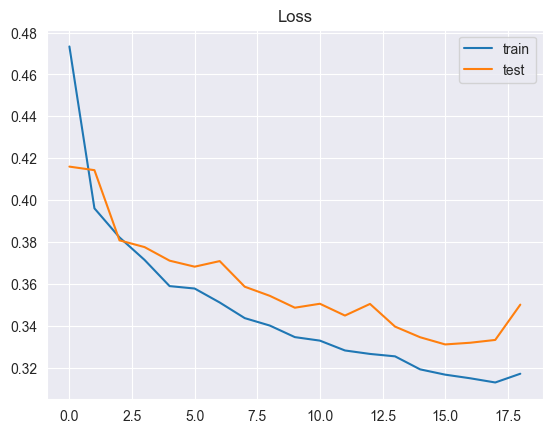

113/113 [==============================] - 0s 688us/step
                        precision    recall  f1-score   support

no-signs of depression    0.83020   0.99631   0.90570      2439
   signs of depression    0.98680   0.57521   0.72678      1170

              accuracy                        0.85979      3609
             macro avg    0.90850   0.78576   0.81624      3609
          weighted avg    0.88097   0.85979   0.84770      3609



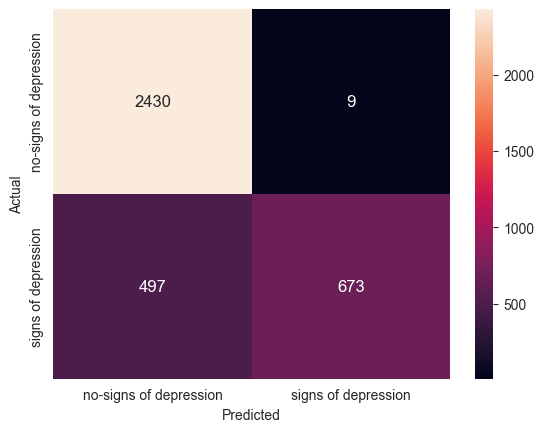

In [132]:
test_small(rawemb_df)

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 32)                24608     
                                                                 
 dropout_32 (Dropout)        (None, 32)                0         
                                                                 
 dense_61 (Dense)            (None, 2)                 66        
                                                                 
Total params: 24,674
Trainable params: 24,674
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
102/102 [==============================] - 1s 3ms/step - loss: 0.0932 - accuracy: 0.9774 - f1_m: 0.9704 - precision_m: 0.9711 - recall_m: 0.9707 - val_loss: 0.0622 - val_accuracy: 0.9813 - val_f1_m: 0.9824 - val_precision_m: 0.9824 - val_recall_m: 0.9824
Epoch 2/100
102/102 [=========================

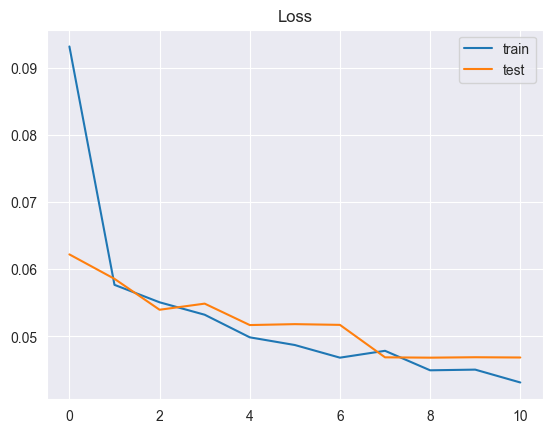

113/113 [==============================] - 0s 755us/step
                        precision    recall  f1-score   support

no-signs of depression    0.98780   0.99631   0.99204      2439
   signs of depression    0.99217   0.97436   0.98318      1170

              accuracy                        0.98919      3609
             macro avg    0.98999   0.98533   0.98761      3609
          weighted avg    0.98922   0.98919   0.98917      3609



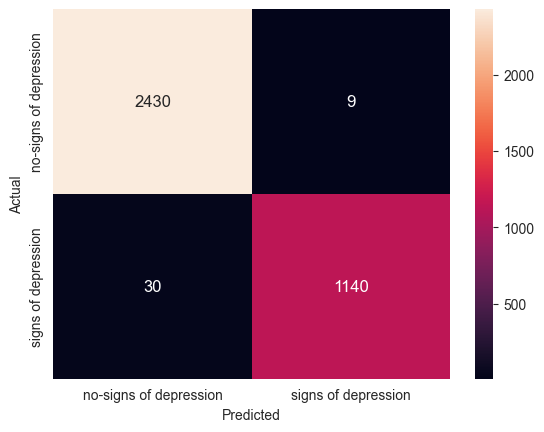

In [133]:
test_small(ftemb_df)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 32)                3232      
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                                 
 dense_28 (Dense)            (None, 2)                 66        
                                                                 
Total params: 3,298
Trainable params: 3,298
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
102/102 [==============================] - 1s 3ms/step - loss: 0.1815 - accuracy: 0.9450 - f1_m: 0.9318 - precision_m: 0.9389 - recall_m: 0.9269 - val_loss: 0.1046 - val_accuracy: 0.9543 - val_f1_m: 0.9554 - val_precision_m: 0.9554 - val_recall_m: 0.9554
Epoch 2/100
102/102 [===========================

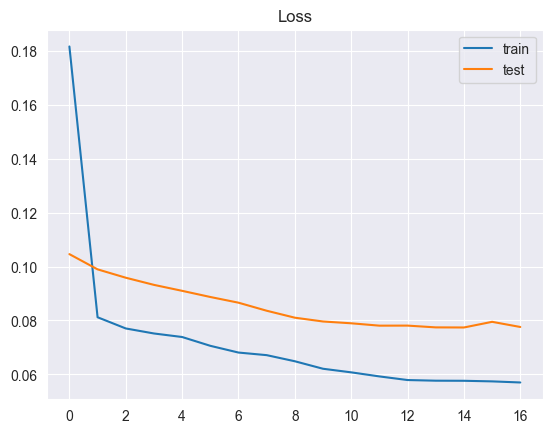

113/113 [==============================] - 0s 589us/step
              precision    recall  f1-score   support

           0    0.98441   0.98360   0.98400      2439
           1    0.96587   0.96752   0.96670      1170

    accuracy                        0.97839      3609
   macro avg    0.97514   0.97556   0.97535      3609
weighted avg    0.97840   0.97839   0.97839      3609



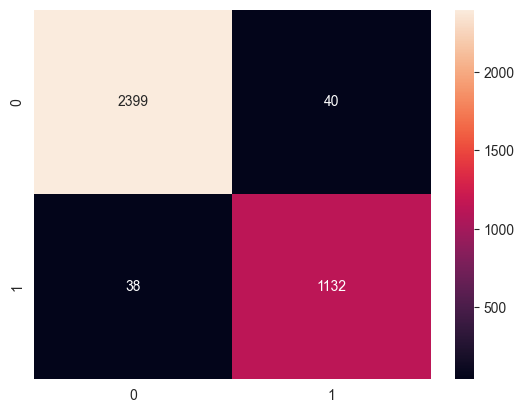

In [90]:
test_small(lstm_df, inp_shape=(100,))

In [91]:
def test_medium(df, inp_shape=(768,)):
    X_train, X_test, Y_train, Y_test = prepareData(df)

    small_model = Sequential()
    small_model.add(Dense(256, activation="relu", input_shape=inp_shape))
    small_model.add(Dropout(0.2))
    small_model.add(Dense(32, activation="relu"))
    small_model.add(Dropout(0.2))
    small_model.add(Dense(2, activation="sigmoid"))
    small_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', f1_m,precision_m, recall_m])
    small_model.summary()

    epochs = 100
    batch_size = 128

    history = small_model.fit(
        X_train, Y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.1,
        callbacks=[
            EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001),
        ]
    )

    accr = small_model.evaluate(X_test, Y_test)
    print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0], accr[1]))

    plt.title('Loss')
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.show()

    predictions = small_model.predict(X_test)
    preds = np.argmax(predictions, axis=1)

    print(classification_report(np.argmax(Y_test, axis=1), preds, digits=5))
    cf_matrix = confusion_matrix(np.argmax(Y_test, axis=1), preds)

    sns.heatmap(cf_matrix, annot=True, fmt='.5g')
    plt.show()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 256)               196864    
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_30 (Dense)            (None, 32)                8224      
                                                                 
 dropout_13 (Dropout)        (None, 32)                0         
                                                                 
 dense_31 (Dense)            (None, 2)                 66        
                                                                 
Total params: 205,154
Trainable params: 205,154
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
102/102 [==========================

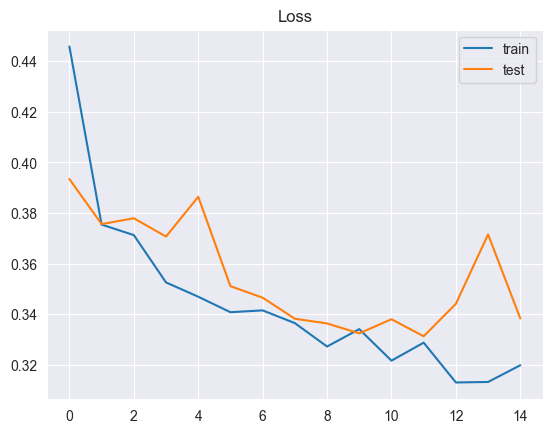

113/113 [==============================] - 0s 959us/step
              precision    recall  f1-score   support

           0    0.85156   0.96433   0.90444      2439
           1    0.89728   0.64957   0.75359      1170

    accuracy                        0.86229      3609
   macro avg    0.87442   0.80695   0.82902      3609
weighted avg    0.86638   0.86229   0.85554      3609



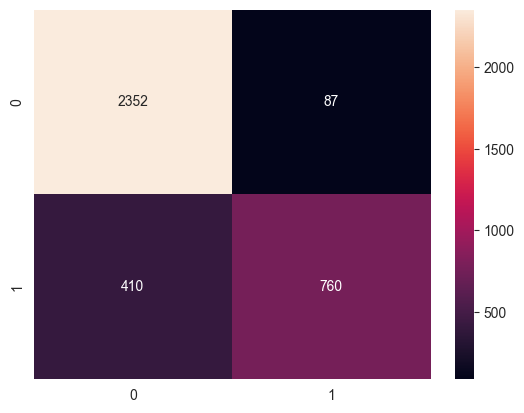

In [92]:
test_medium(rawemb_df)

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 256)               196864    
                                                                 
 dropout_14 (Dropout)        (None, 256)               0         
                                                                 
 dense_33 (Dense)            (None, 32)                8224      
                                                                 
 dropout_15 (Dropout)        (None, 32)                0         
                                                                 
 dense_34 (Dense)            (None, 2)                 66        
                                                                 
Total params: 205,154
Trainable params: 205,154
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
102/102 [==========================

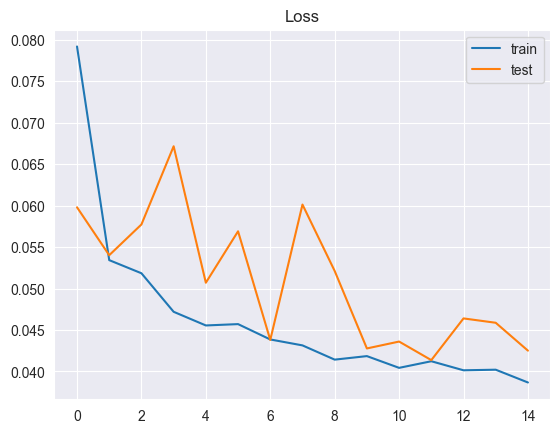

113/113 [==============================] - 0s 991us/step
              precision    recall  f1-score   support

           0    0.98741   0.99713   0.99225      2439
           1    0.99389   0.97350   0.98359      1170

    accuracy                        0.98947      3609
   macro avg    0.99065   0.98532   0.98792      3609
weighted avg    0.98951   0.98947   0.98944      3609



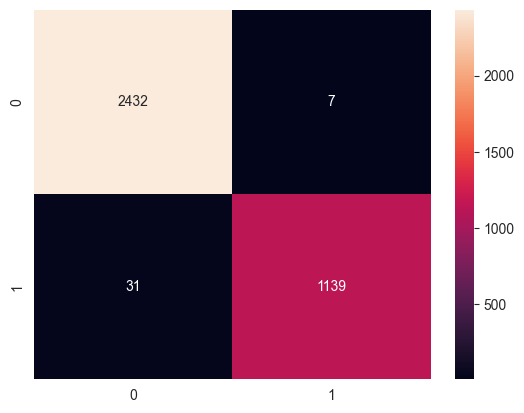

In [93]:
test_medium(ftemb_df)

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 256)               25856     
                                                                 
 dropout_16 (Dropout)        (None, 256)               0         
                                                                 
 dense_36 (Dense)            (None, 32)                8224      
                                                                 
 dropout_17 (Dropout)        (None, 32)                0         
                                                                 
 dense_37 (Dense)            (None, 2)                 66        
                                                                 
Total params: 34,146
Trainable params: 34,146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
102/102 [============================

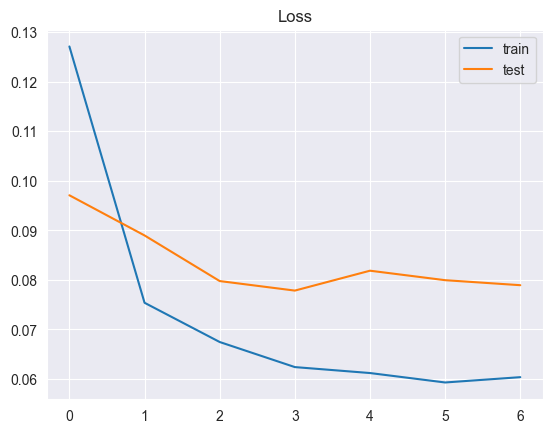

113/113 [==============================] - 0s 639us/step
              precision    recall  f1-score   support

           0    0.98441   0.98360   0.98400      2439
           1    0.96587   0.96752   0.96670      1170

    accuracy                        0.97839      3609
   macro avg    0.97514   0.97556   0.97535      3609
weighted avg    0.97840   0.97839   0.97839      3609



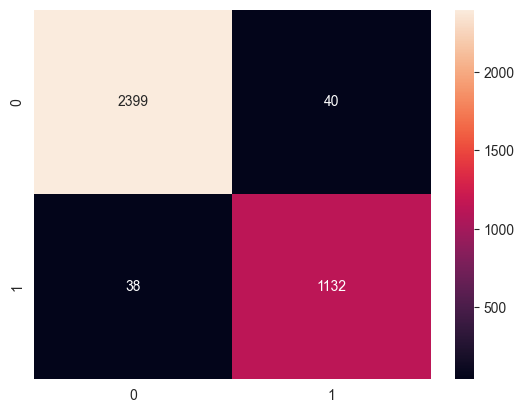

In [94]:
test_medium(lstm_df, inp_shape=(100,))

In [95]:
def test_large(df, inp_shape=(768,)):
    X_train, X_test, Y_train, Y_test = prepareData(df)

    small_model = Sequential()
    small_model.add(Dense(1024, activation="relu", input_shape=inp_shape))
    small_model.add(Dropout(0.2))
    small_model.add(Dense(256, activation="relu"))
    small_model.add(Dropout(0.2))
    small_model.add(Dense(32, activation="relu"))
    small_model.add(Dropout(0.2))
    small_model.add(Dense(2, activation="sigmoid"))
    small_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', f1_m,precision_m, recall_m])
    small_model.summary()

    epochs = 100
    batch_size = 128

    history = small_model.fit(
        X_train, Y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.1,
        callbacks=[
            EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001),
        ]
    )

    accr = small_model.evaluate(X_test, Y_test)
    print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0], accr[1]))

    plt.title('Loss')
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.show()

    predictions = small_model.predict(X_test)
    preds = np.argmax(predictions, axis=1)

    print(classification_report(np.argmax(Y_test, axis=1), preds, digits=5))
    cf_matrix = confusion_matrix(np.argmax(Y_test, axis=1), preds)

    sns.heatmap(cf_matrix, annot=True, fmt='.5g')
    plt.show()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 1024)              787456    
                                                                 
 dropout_18 (Dropout)        (None, 1024)              0         
                                                                 
 dense_39 (Dense)            (None, 256)               262400    
                                                                 
 dropout_19 (Dropout)        (None, 256)               0         
                                                                 
 dense_40 (Dense)            (None, 32)                8224      
                                                                 
 dropout_20 (Dropout)        (None, 32)                0         
                                                                 
 dense_41 (Dense)            (None, 2)               

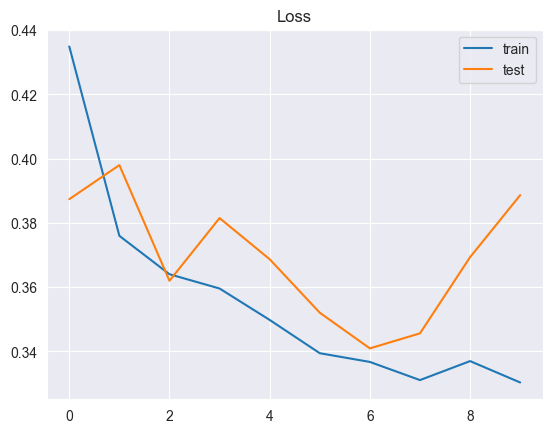

113/113 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0    0.89970   0.86429   0.88164      2439
           1    0.73855   0.79915   0.76765      1170

    accuracy                        0.84317      3609
   macro avg    0.81912   0.83172   0.82465      3609
weighted avg    0.84746   0.84317   0.84469      3609



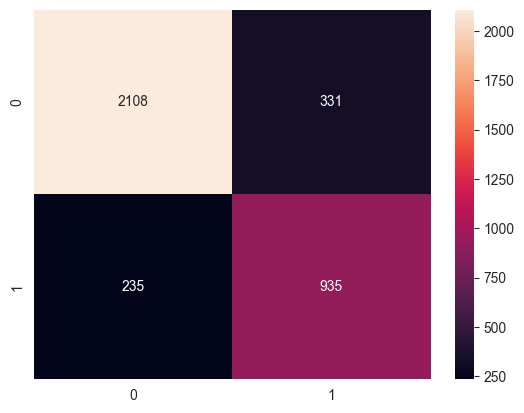

In [96]:
test_large(rawemb_df)

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 1024)              787456    
                                                                 
 dropout_21 (Dropout)        (None, 1024)              0         
                                                                 
 dense_43 (Dense)            (None, 256)               262400    
                                                                 
 dropout_22 (Dropout)        (None, 256)               0         
                                                                 
 dense_44 (Dense)            (None, 32)                8224      
                                                                 
 dropout_23 (Dropout)        (None, 32)                0         
                                                                 
 dense_45 (Dense)            (None, 2)               

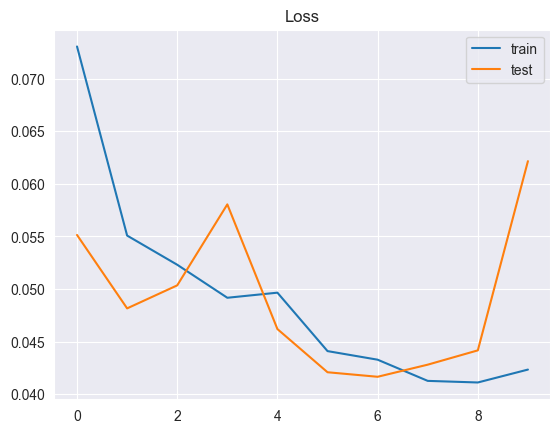

113/113 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0    0.98542   0.99754   0.99144      2439
           1    0.99474   0.96923   0.98182      1170

    accuracy                        0.98836      3609
   macro avg    0.99008   0.98339   0.98663      3609
weighted avg    0.98844   0.98836   0.98832      3609



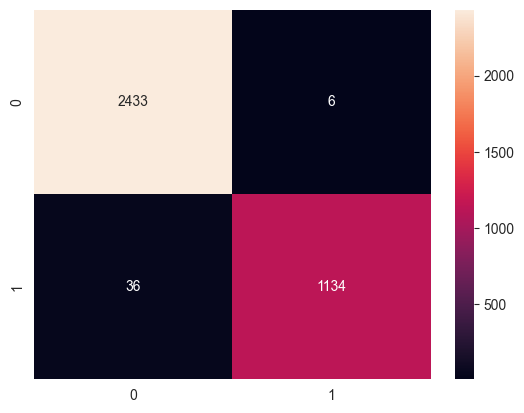

In [97]:
test_large(ftemb_df)

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 1024)              103424    
                                                                 
 dropout_24 (Dropout)        (None, 1024)              0         
                                                                 
 dense_47 (Dense)            (None, 256)               262400    
                                                                 
 dropout_25 (Dropout)        (None, 256)               0         
                                                                 
 dense_48 (Dense)            (None, 32)                8224      
                                                                 
 dropout_26 (Dropout)        (None, 32)                0         
                                                                 
 dense_49 (Dense)            (None, 2)               

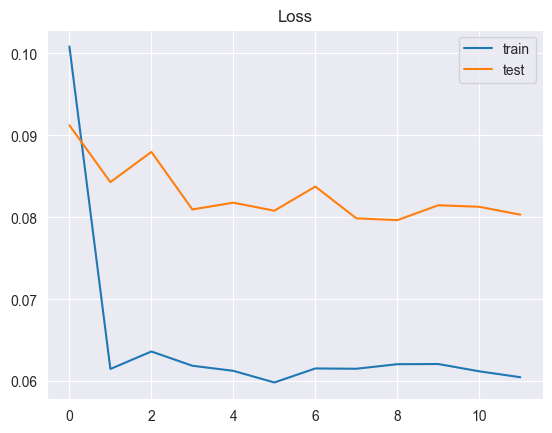

113/113 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0    0.98441   0.98360   0.98400      2439
           1    0.96587   0.96752   0.96670      1170

    accuracy                        0.97839      3609
   macro avg    0.97514   0.97556   0.97535      3609
weighted avg    0.97840   0.97839   0.97839      3609



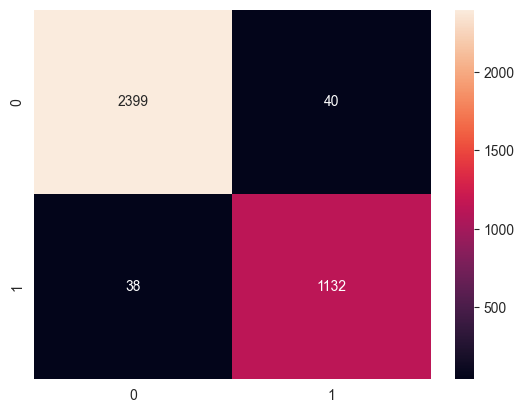

In [98]:
test_large(lstm_df, inp_shape=(100,))

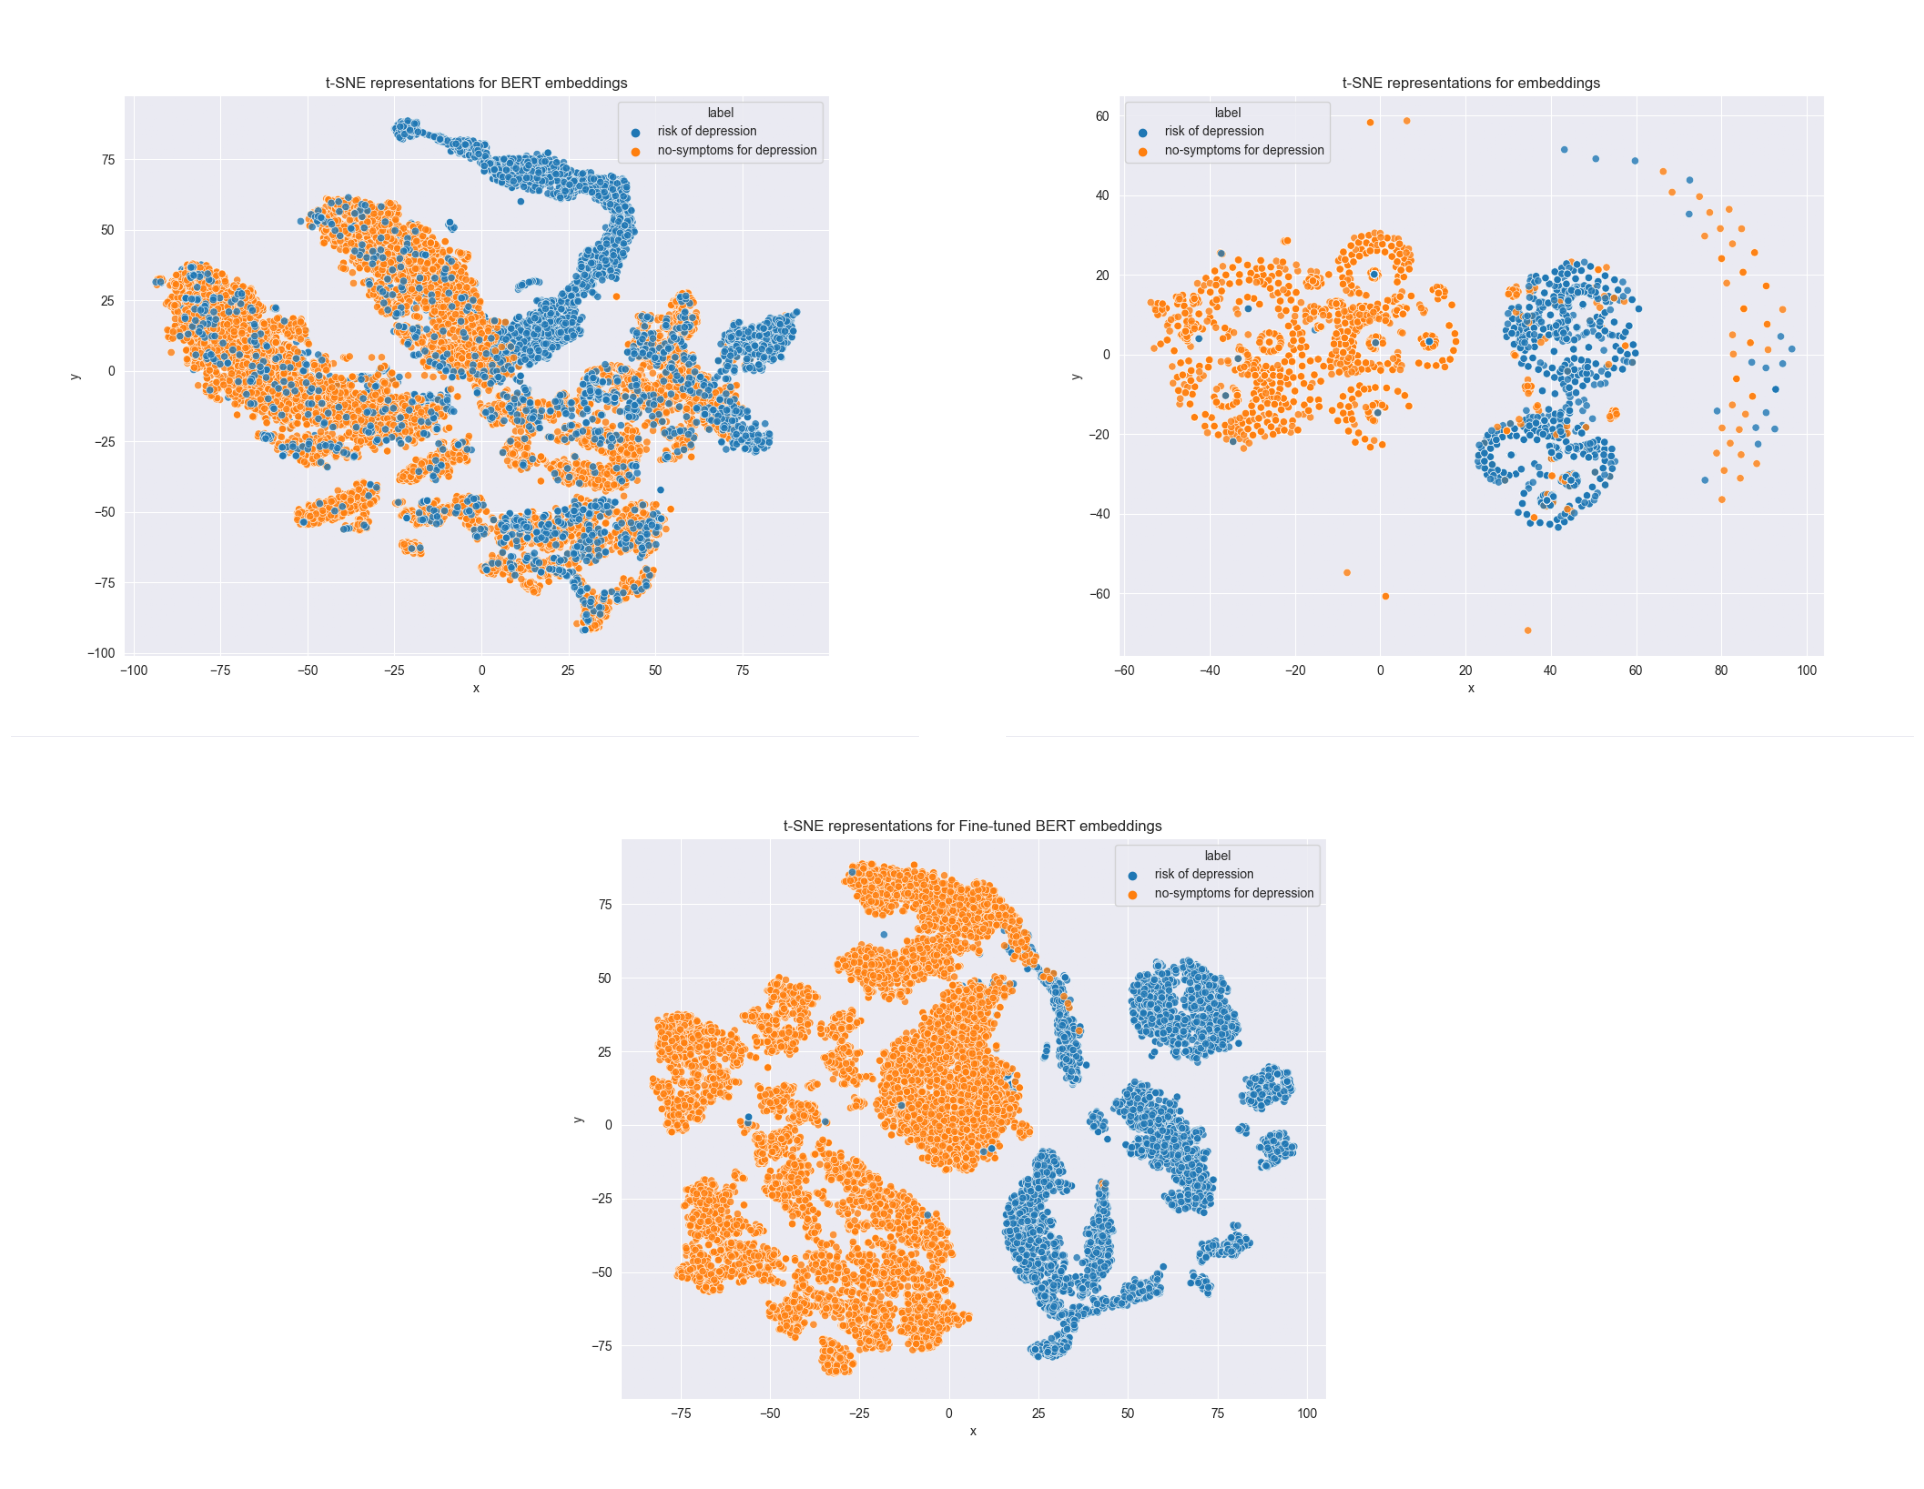

In [120]:
import matplotlib.gridspec as gridspec
files = ["tsne_raw.png", "tsne_lstm.png", "tsne_finetuned.png"]

fig = plt.figure(figsize=(30,15),tight_layout=True)
spec = gridspec.GridSpec(ncols=6, nrows=2, figure=fig)

ax1 = fig.add_subplot(spec[0,1:3])
pic1 = plt.imread(files[0])
ax1.imshow(pic1)

ax2 = fig.add_subplot(spec[0,3:5])
pic2 = plt.imread(files[1])
ax2.imshow(pic2)

ax3 = fig.add_subplot(spec[1,2:4])
pic3 = plt.imread(files[2])
ax3.imshow(pic3)

ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ax3.get_xaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)

plt.savefig("combined_tsne.png")
plt.show() # bbox_inches='tight'

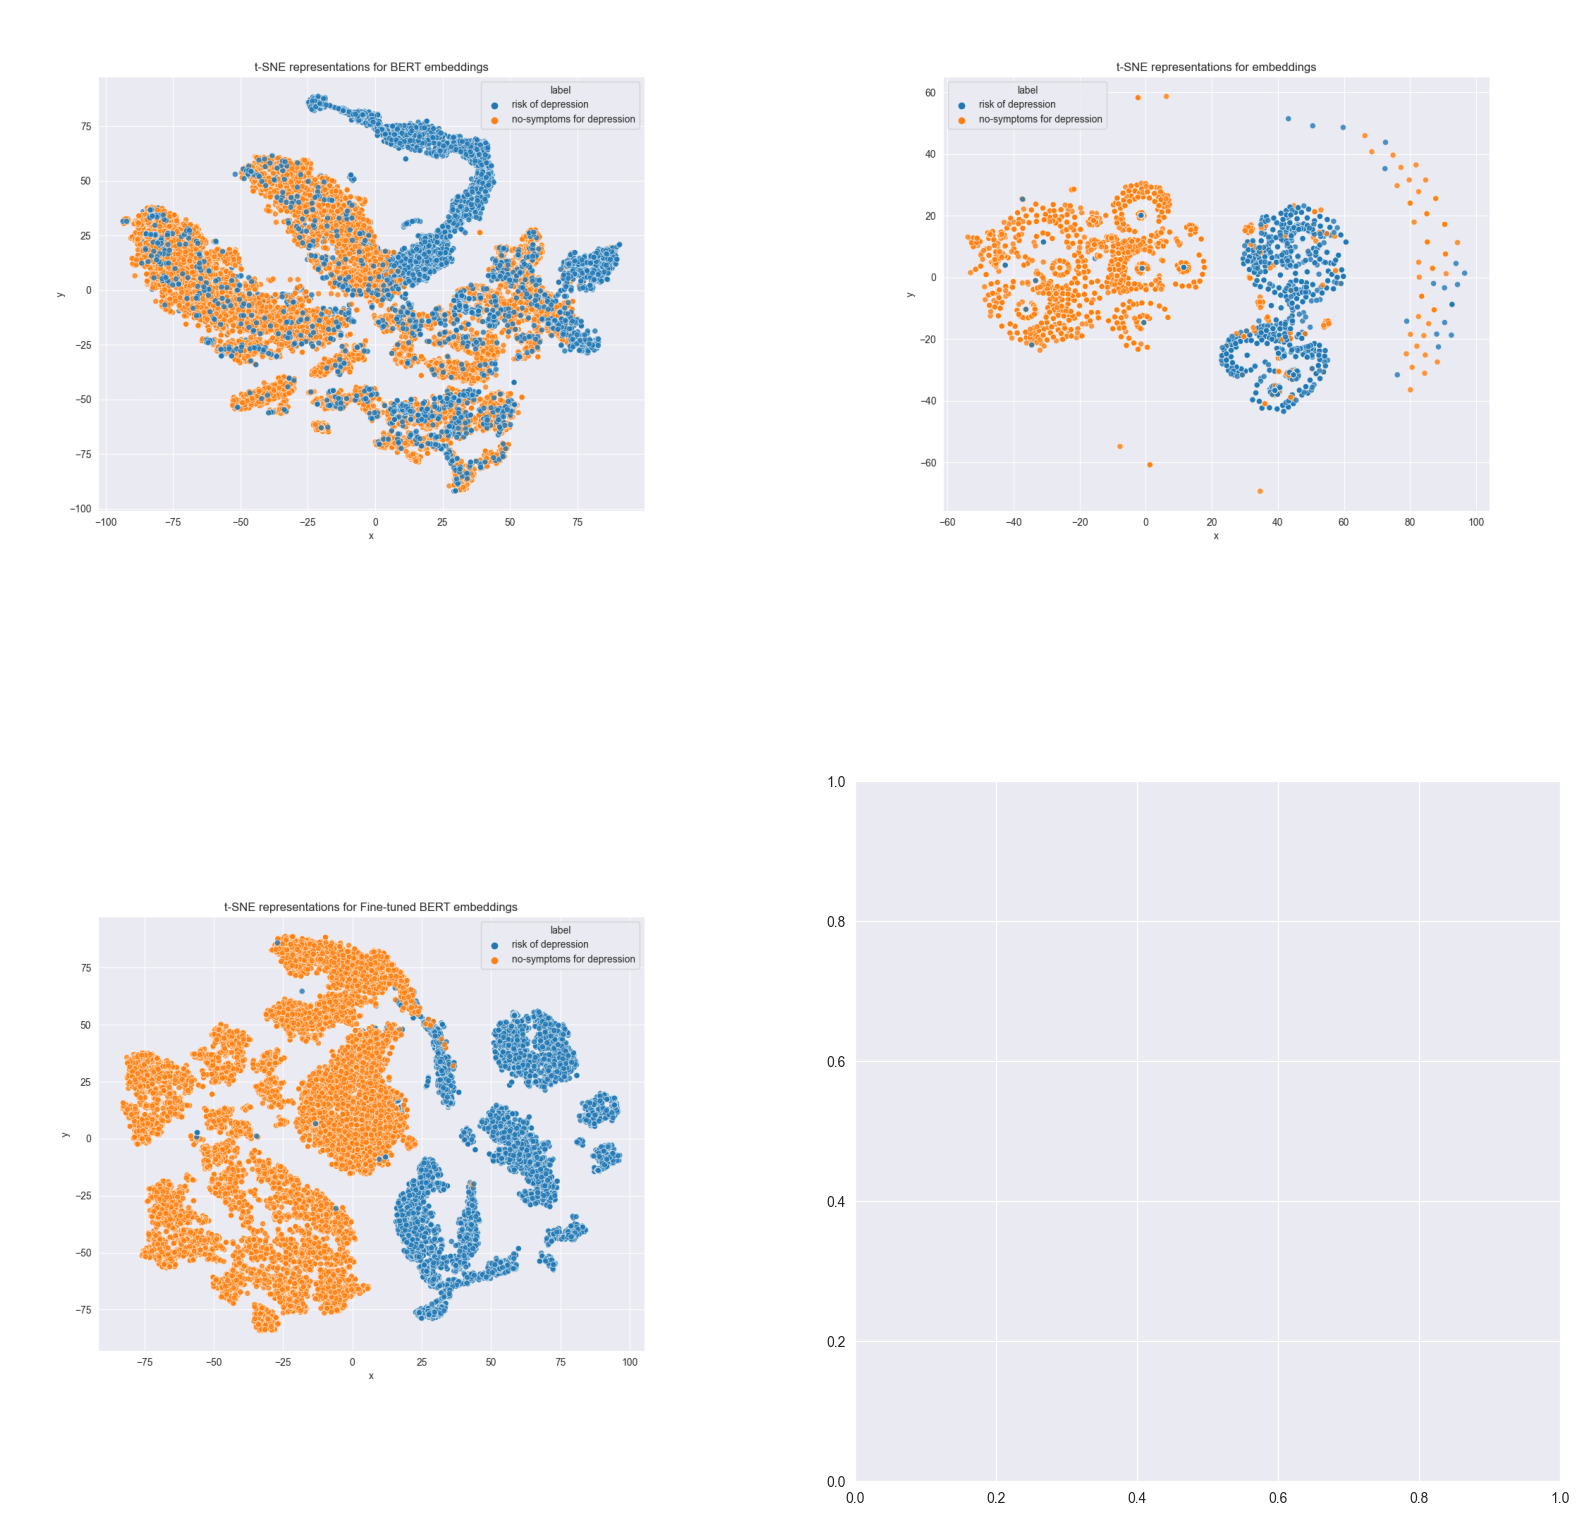

In [109]:
# extract the image paths into a list
files = ["tsne_raw.png", "tsne_lstm.png", "tsne_finetuned.png"]

# create the figure
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
# flatten the axis into a 1-d array to make it easier to access each axes
axs = axs.flatten()

# iterate through and enumerate the files, use i to index the axes
for i, file in enumerate(files):
    # read the image in
    pic = plt.imread(file)
    axs[i].get_xaxis().set_visible(False)
    axs[i].get_yaxis().set_visible(False)
    # add the image to the axes
    axs[i].imshow(pic)

plt.show()